In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download(["names",'shakespeare',"stopwords","state_union","twitter_samples","movie_reviews","averaged_perceptron_tagger","vader_lexicon","punkt",])

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [41]:
city = "KualaLumpur"

In [46]:
f = open("Hotel Reviews DB/"+ city +"/"+ city +"_Hotels_Master.csv", "r")
urls = f.readlines()
f.close()

import re
pattern = "Reviews-(.*?)-Kuala_Lumpur_Wilayah_Persekutuan.html#"
hotels = []
for url in urls:
    hotels.append(re.search(pattern, url).group(1))

print(len(hotels))

20


In [47]:
f = open("Hotel Reviews DB/"+ city +"/overall_rating.csv", "r")
overall_rating = f.readlines()
f.close()

In [48]:
polarity = []
for i in range(1,21):
    f1 = open("Hotel Reviews DB/"+ city +"/Reviews/"+ city +"_reviews_"+ str(i) +".csv", "r")
    f2 = open("Hotel Reviews DB/"+ city +"/Ratings/"+ city +"_ratings_"+ str(i) +".csv", "r")
    reviews = []
    ratings = []
    polscores = []
    reviews = f1.readlines()
    for i in range(0, len(reviews)):
        reviews[i] = reviews[i].rstrip("\n")
    ratings = f2.readlines()
    for i in range(0,len(ratings)):
        ratings[i] = float(ratings[i].rstrip("\n"))
    f1.close()
    f2.close()
    for review in reviews:
        polscores.append(sia.polarity_scores(review)['compound'])
    polarity.append(sum(polscores)/len(polscores))

In [49]:
print(polarity)
print(overall_rating)

[0.807042105263158, 0.8424259999999997, 0.8998880000000002, 0.9203480000000002, 0.7488294736842104, 0.8650909999999996, 0.909017, 0.7542019999999999, 0.7759089999999996, 0.8962980000000002, 0.6308680000000002, 0.7393980000000003, 0.5167400000000001, 0.6656749999999999, 0.6554820000000001, 0.8861860000000005, 0.7644610000000001, 0.8030870000000001, 0.5063749999999998, 0.568055]
['4.5\n', '5.0\n', '4.5\n', '4.5\n', '4.5\n', '4.5\n', '4.5\n', '4.5\n', '4.5\n', '4.0\n', '4.5\n', '4.0\n', '4.5\n', '4.5\n', '4.0\n', '5.0\n', '4.5\n', '4.5\n', '3.5\n', '3.5']


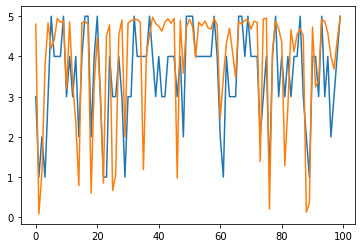

In [50]:
from matplotlib import pyplot as plt
plt.plot(ratings)
plt.plot([2.5*(i+1) for i in polscores])
plt.show()

In [51]:
import csv
# opening the csv file in 'w+' mode
filename = "VizData_"+ city +".csv"
file = open(filename, 'w', newline ='\n')
  
# writing the data into the file
with file:    
    write = csv.writer(file, dialect='excel')
    for i in range(0,len(hotels)):
        write.writerow([hotels[i].replace("_"," "), round(polarity[i], 5), float(overall_rating[i].rstrip("\n"))])
file.close()